In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()
reversed_word_index = dict([(v, k) for (k, v) in word_index.items()])
decoded_review = ' '.join([reversed_word_index.get(i - 3, ' ? ') for i in x_train[2]])
decoded_review

" ?  this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had  ?  working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how  ?  this is to watch save yourself an hour a bit of your life"

In [4]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [5]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [6]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [7]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [48]:
network = models.Sequential()
network.add(layers.Dense(16, activation = 'tanh', input_shape=(10000,)))
network.add(layers.Dense(1, activation = 'sigmoid'))

In [49]:
network.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

In [50]:
history = network.fit(
    partial_x_train,
    partial_y_train,
    epochs = 5,
    batch_size = 512,
    validation_data=(x_val, y_val)
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 3s 173us/step - loss: 0.4943 - acc: 0.8037 - val_loss: 0.3748 - val_acc: 0.8614
Epoch 2/5
20000/20000 [==============================] - 3s 151us/step - loss: 0.3006 - acc: 0.9031 - val_loss: 0.3064 - val_acc: 0.8852
Epoch 3/5
20000/20000 [==============================] - 3s 152us/step - loss: 0.2340 - acc: 0.9257 - val_loss: 0.2820 - val_acc: 0.8932
Epoch 4/5
20000/20000 [==============================] - 3s 148us/step - loss: 0.1942 - acc: 0.9391 - val_loss: 0.2727 - val_acc: 0.8920
Epoch 5/5
20000/20000 [==============================] - 3s 148us/step - loss: 0.1661 - acc: 0.9492 - val_loss: 0.2724 - val_acc: 0.8906


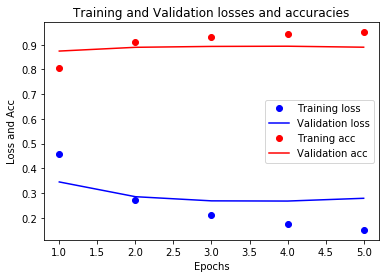

In [33]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss) + 1)
plt.clf()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.plot(epochs, acc, 'ro', label = 'Traning acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and Validation losses and accuracies')
plt.xlabel('Epochs')
plt.ylabel('Loss and Acc')
plt.legend()

plt.show()

In [51]:
network.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 133us/step


[0.2918154449462891, 0.88012]

In [13]:
network.predict(x_test)

array([[0.24403547],
       [0.9992725 ],
       [0.509911  ],
       ...,
       [0.13854817],
       [0.06644516],
       [0.4915468 ]], dtype=float32)